In [1]:
pip install -q librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import numpy as np
import IPython.display as ipd

In [3]:
audio_data = 'data/NormalSpeech_Spk1_Spk1_s1.wav'
'''
x: Speech Signal (1D array)
sr = Sampling rate
'''
x,sr=librosa.load(audio_data, mono=True)
#x, sr = librosa.load(audio_data, sr=16000, mono=False)

print (type(x), type(sr))
print('Speech signal shape:', x.shape)
print('Sampling Rate:', sr)

'''
Say speech signal shape is 29978
Sampling rate is 22050
22050 samples = 1 second
1 sample = 1/22050 seconds
29978 samples = 29978/22050 seconds. This is the total duration of audio.
'''

audio_duration = len(x)/sr
print('Speech signal duration in seconds = ', audio_duration)

<class 'numpy.ndarray'> <class 'int'>
Speech signal shape: (29978,)
Sampling Rate: 22050
Speech signal duration in seconds =  1.359546485260771


In [4]:
#Load file to play audio
ipd.Audio(audio_data)

In [5]:
#Load file to play audio with automatically play
ipd.Audio(audio_data, autoplay=True)

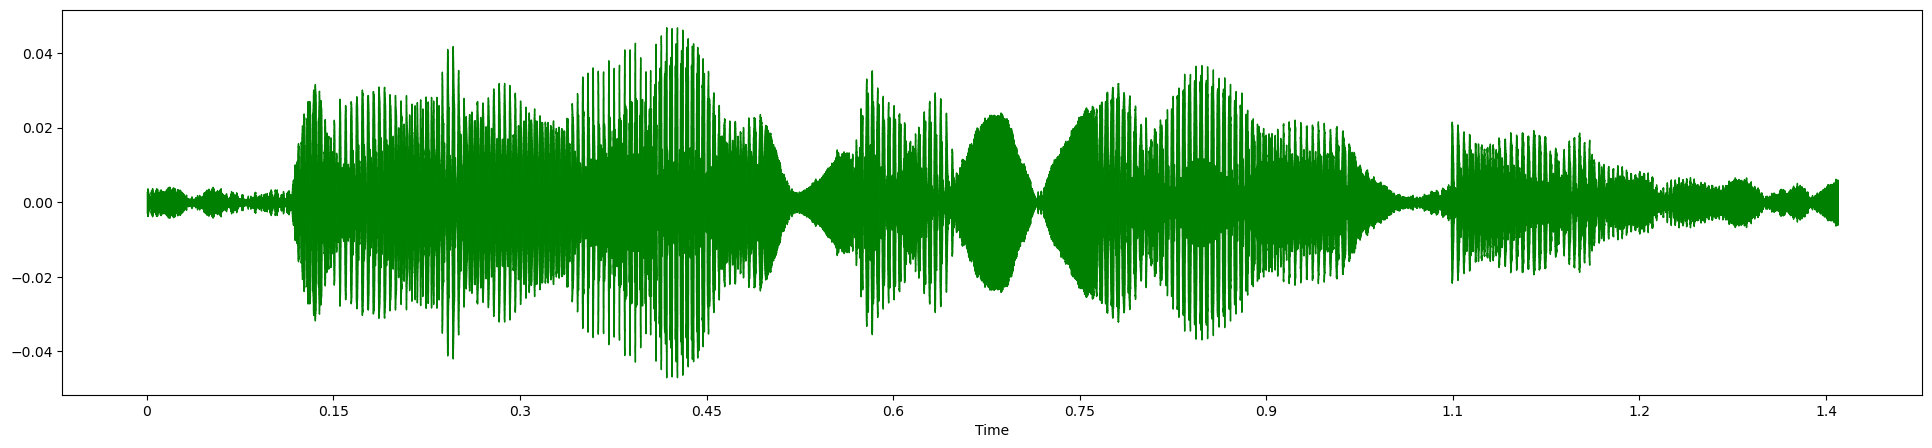

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,5))
librosa.display.waveshow(x, sr=sr, color='g')
plt.show()

## Divide audio signal into shorter chunks
Types of Windows
- Hamming Window
- Hanning Window


In [7]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,fmin=librosa.note_to_hz('C2'), fmax=600)
times = librosa.times_like(f0)
print('voiced_flag shap', np.shape(voiced_flag))
print('f0 shap', np.shape(f0))
print(voiced_probs)
'''
Male range 70-170 hz
female 140-250 hz
kids 250-450 hz
'''

voiced_flag shap (59,)
f0 shap (59,)
[0.01       0.01       0.01       0.         0.01       0.01
 0.06608151 0.3721359  0.82666856 1.         1.         0.89114449
 0.89114449 1.         1.         0.98487898 0.94593021 0.98487898
 0.89114449 0.89114449 0.94593021 0.75716013 0.2065068  0.01000419
 0.         0.01019108 0.12793709 0.82666856 0.54852505 0.2065068
 0.         0.         0.         0.01       0.27960517 0.68608281
 0.68608281 0.98487898 0.98487898 0.98487898 0.98487898 0.94593021
 0.3721359  0.06608151 0.01       0.01       0.27960517 0.89114449
 0.94593021 0.61594989 0.03489743 0.01818738 0.01034906 0.03010686
 0.01240312 0.01010197 0.01       0.         0.01      ]


'\nMale range 70-170 hz\nfemale 140-250 hz\nkids 250-450 hz\n'

### Zooming in

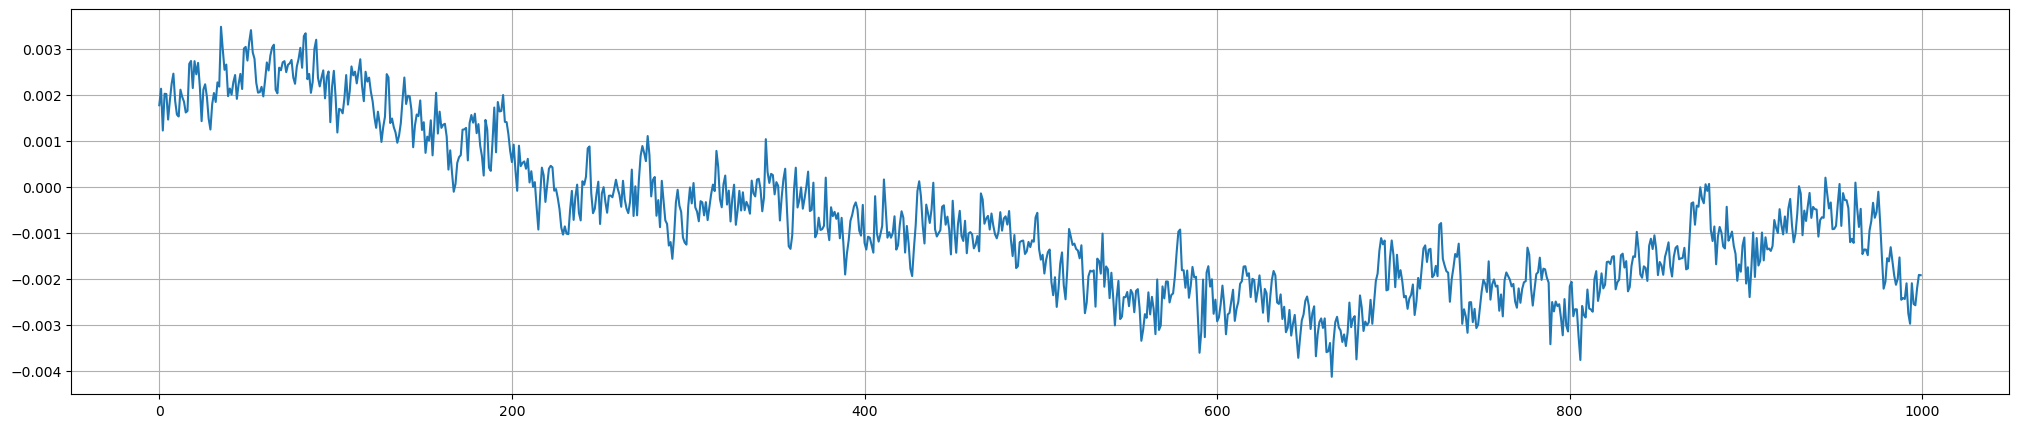

In [8]:
n0=500
n1=1500
plt.figure(figsize=(25,5))
plt.plot(x[n0:n1])
plt.grid()


In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1])
print(sum(zero_crossings))

76


In [10]:
zcr=np.squeeze(librosa.feature.zero_crossing_rate(x))
print('ZCR: ', zcr)

times=librosa.times_like(zcr)
times_x=librosa.times_like(x)
times_no_sample = np.divide(list(range(0, len(x))),sr)


print('times shape:', np.shape(times))
print('zcr shape:', np.shape(zcr))
print('times no of sample:', times_no_sample)

# We should check that times and zcr should match

ZCR:  [0.03173828 0.03759766 0.06933594 0.08349609 0.05712891 0.05615234
 0.02978516 0.01953125 0.02050781 0.02050781 0.02050781 0.02197266
 0.02148438 0.02197266 0.02685547 0.03076172 0.03710938 0.04492188
 0.04345703 0.03857422 0.02832031 0.01513672 0.00634766 0.00390625
 0.01318359 0.01953125 0.02685547 0.02392578 0.01367188 0.01953125
 0.01220703 0.01220703 0.01513672 0.00878906 0.01513672 0.02001953
 0.02734375 0.02734375 0.02880859 0.03173828 0.02539062 0.01953125
 0.02685547 0.02978516 0.03076172 0.03564453 0.02539062 0.02050781
 0.02001953 0.02294922 0.02294922 0.02734375 0.02294922 0.01513672
 0.01318359 0.01367188 0.02490234 0.02490234 0.02197266]
times shape: (59,)
zcr shape: (59,)
times no of sample: [0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.35941043e+00
 1.35945578e+00 1.35950113e+00]


In [11]:
#Construct a pure tone (cosine signal) at a given frequency

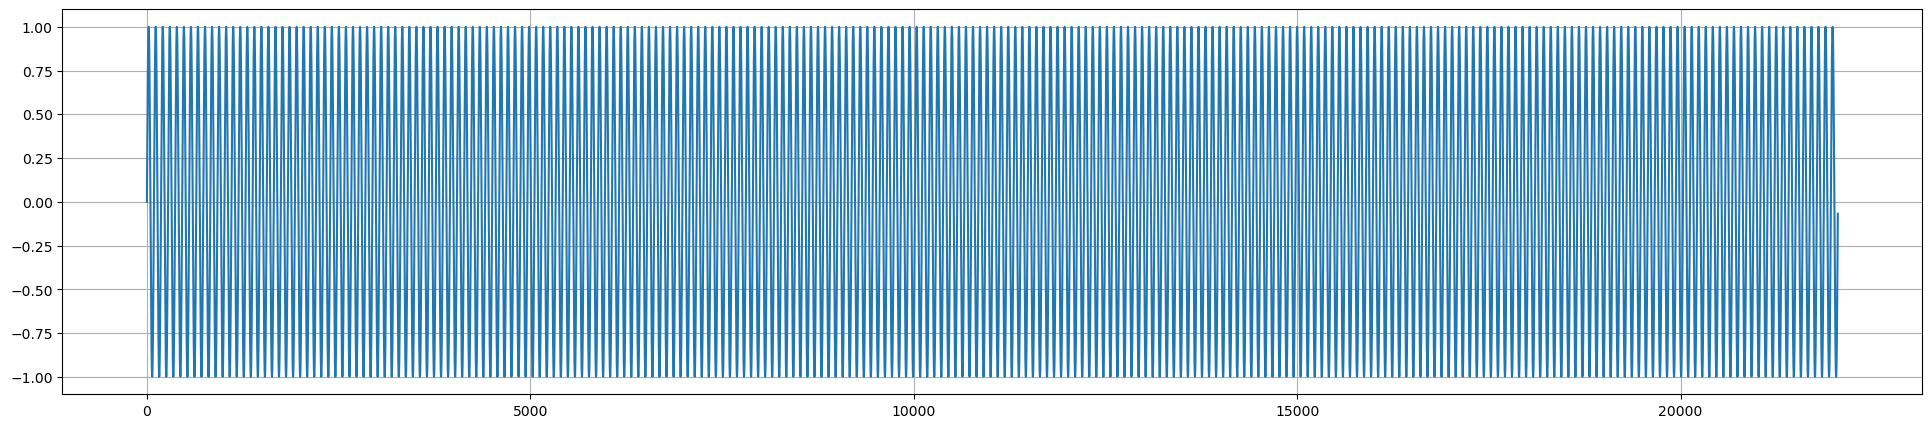

In [12]:
import librosa.display
tone=librosa.tone(240,duration=1)
plt.figure(figsize=(24,5))
plt.plot(tone)
plt.grid()

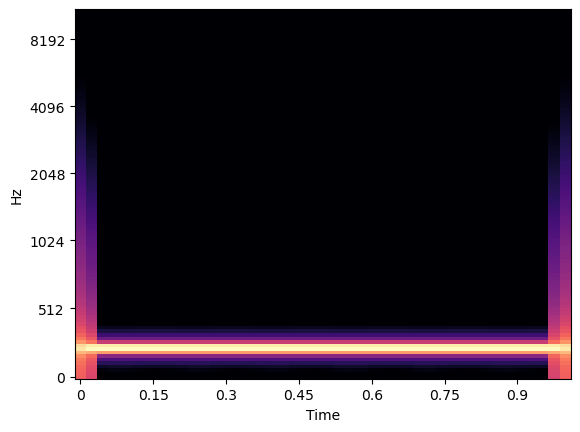

In [13]:
import librosa.feature

fig,ax = plt.subplots()
S =librosa.feature.melspectrogram(y=tone)
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),x_axis='time', y_axis='mel', ax=ax)

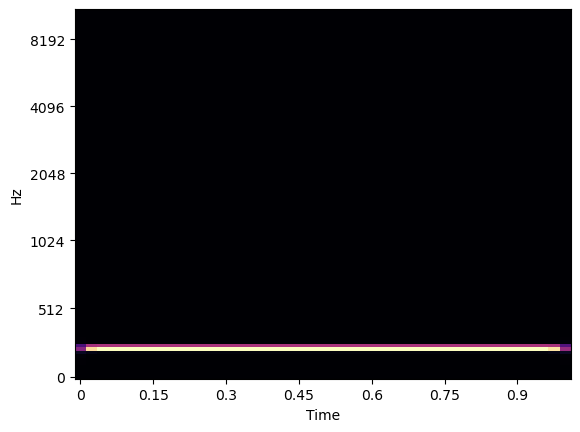

In [14]:

fig,ax = plt.subplots()
S =librosa.feature.melspectrogram(y=tone)
librosa.display.specshow(S,x_axis='time', y_axis='mel', ax=ax)

## Multi Tone signals

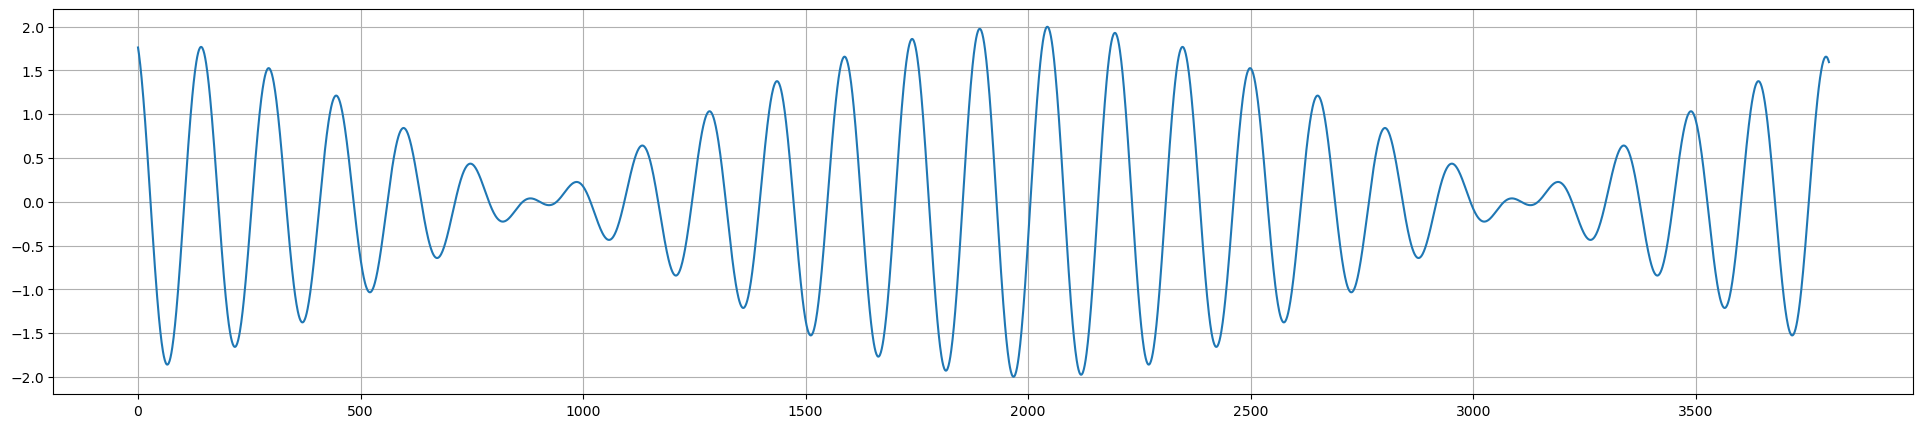

In [15]:
tone1=librosa.tone(140,duration=1)
tone2=librosa.tone(150,duration=1)
tone3=librosa.tone(780,duration=1)
tone=tone1+tone2#+tone3

plt.figure(figsize=(24,5))
plt.plot(tone[200:4000])
plt.grid()

In [16]:
# Create a tone based on different values. Change the value post pi and there tone changes

import soundfile as sf

sr=22050
T=3.0
t=np.linspace(0,T,int(T*sr))
x=0.5*np.sin(2*np.pi*220*t)

ipd.Audio(x,rate=sr)
sf.write('data/tone_220.wav',x,sr)

In [17]:
ipd.Audio('data/tone_220.wav')


In [18]:
ipd.Audio('data/tone_420.wav')


In [19]:
ipd.Audio('data/tone_920.wav')